In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [12]:
pip install pandas-datareader


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [74]:
import pandas_datareader.data as pdr

In [75]:
from datetime import datetime
from __future__ import division

In [76]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [77]:
import yfinance as yf
yf.pdr_override()

In [79]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [80]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,158.975937,160.753148,157.407490,159.149203,158.803166,7.015692e+07
std,17.956218,17.724282,18.276032,17.998889,18.144256,2.333310e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.470383,5.277610e+07
50%,154.789993,157.089996,153.369995,155.000000,154.602554,6.557380e+07
75%,171.850006,173.295006,171.139999,172.070007,171.955002,8.073500e+07
max,196.240005,198.229996,195.279999,196.449997,196.449997,1.647624e+08


<AxesSubplot:xlabel='Date'>

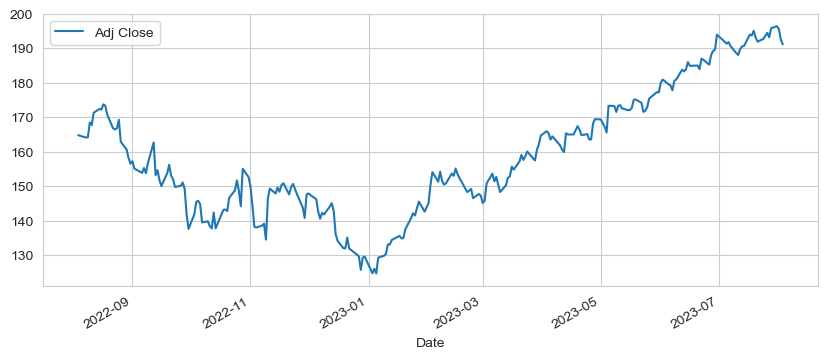

In [81]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

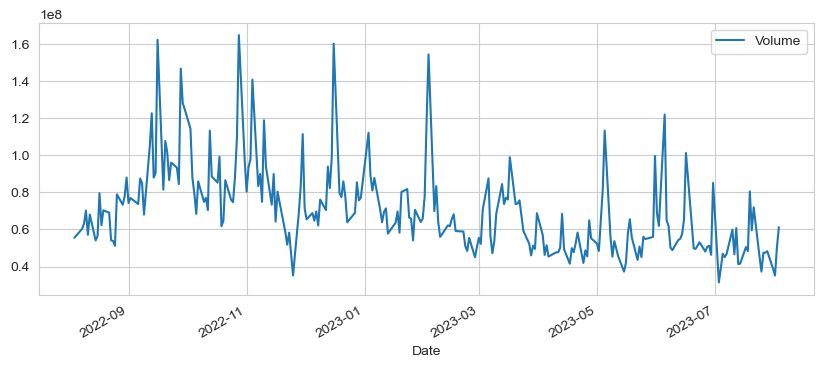

In [82]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [98]:
window_size = 20
rolling_mean = AAPL['Adj Close'].rolling(window=window_size).mean()
AAPL['MA for 10 days'] = rolling_mean

In [102]:
window_size = 20
rolling_mean = AAPL['Adj Close'].rolling(window=window_size).mean()
AAPL['MA for 20 days'] = rolling_mean

In [103]:
window_size = 50
rolling_mean = AAPL['Adj Close'].rolling(window=window_size).mean()
AAPL['MA for 50 days'] = rolling_mean

<AxesSubplot:xlabel='Date'>

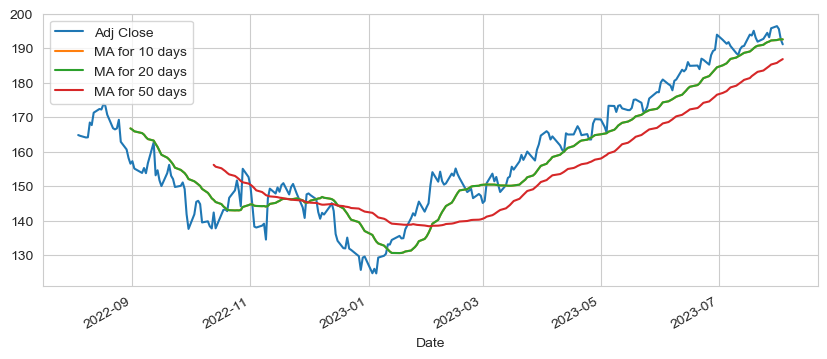

In [104]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

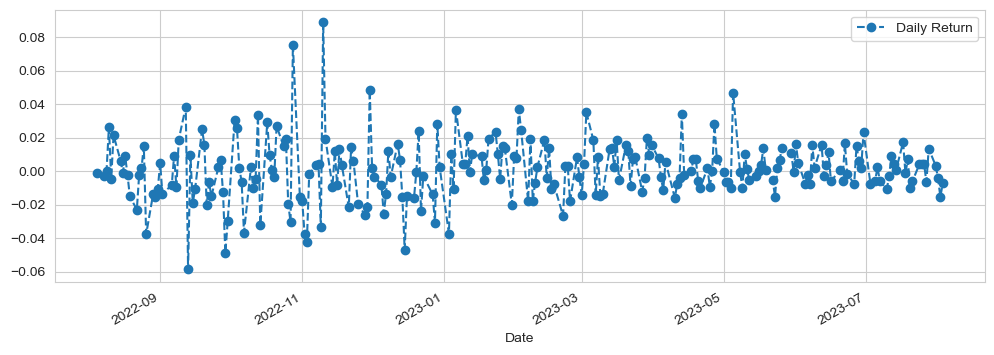

In [105]:
AAPL['Daily Return']= AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

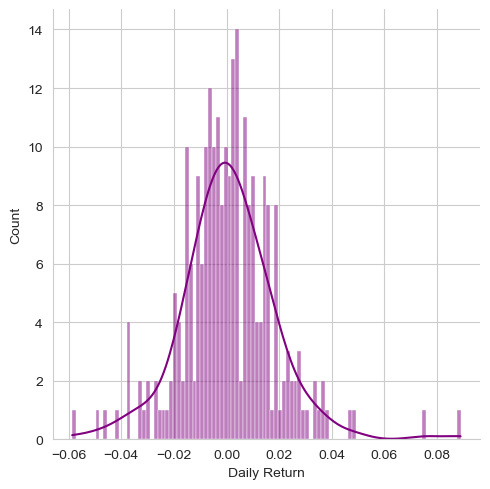

In [108]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple',kde=True)

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

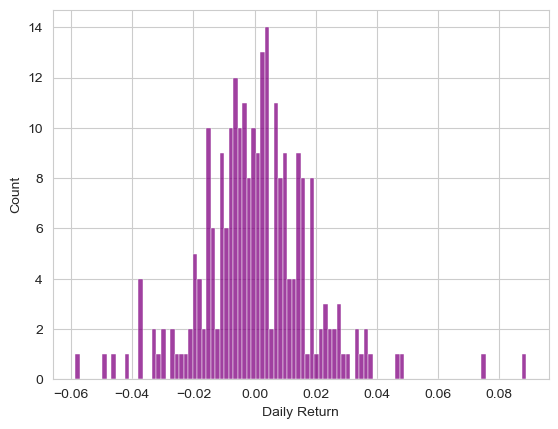

In [109]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [112]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [113]:
closing_df

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-04,164.825790,142.570007,118.870003,280.934418
2022-08-05,164.596832,140.800003,118.220001,280.201477
2022-08-08,164.119019,139.410004,118.139999,277.636292
2022-08-09,164.168793,137.830002,117.500000,279.597321
2022-08-10,168.469131,142.690002,120.650002,286.391663
...,...,...,...,...
2023-07-31,196.449997,133.679993,133.110001,335.920013
2023-08-01,195.610001,131.690002,131.889999,336.339996
2023-08-02,192.580002,128.210007,128.639999,327.500000


In [114]:
tech_rets = closing_df.pct_change()

In [117]:
tech_rets.tail()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-07-31,0.003166,0.011119,0.000752,-0.007241
2023-08-01,-0.004276,-0.014886,-0.009165,0.001250
2023-08-02,-0.015490,-0.026426,-0.024642,-0.026283
2023-08-03,-0.007322,0.005460,0.001011,-0.002565
2023-08-04,-0.048020,0.082693,-0.001786,0.003429


In [123]:
import scipy.stats as stats
from scipy.stats import pearsonr

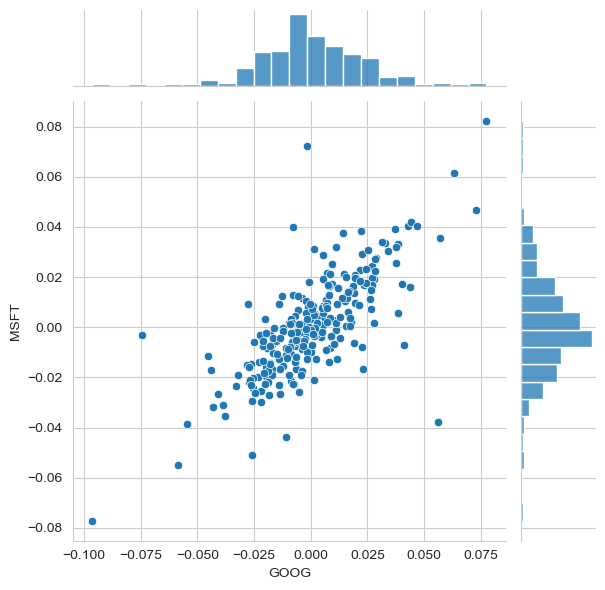

In [126]:
j = sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

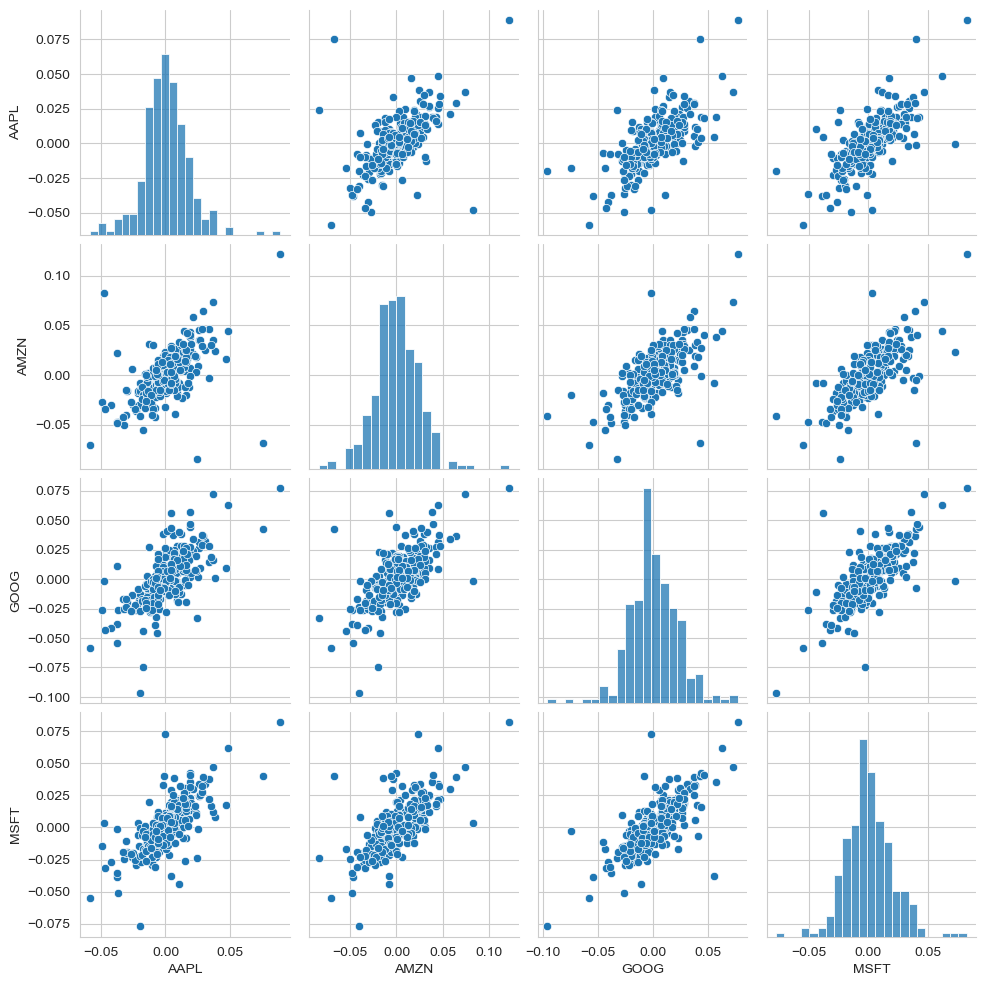

In [127]:
sns.pairplot(tech_rets.dropna())

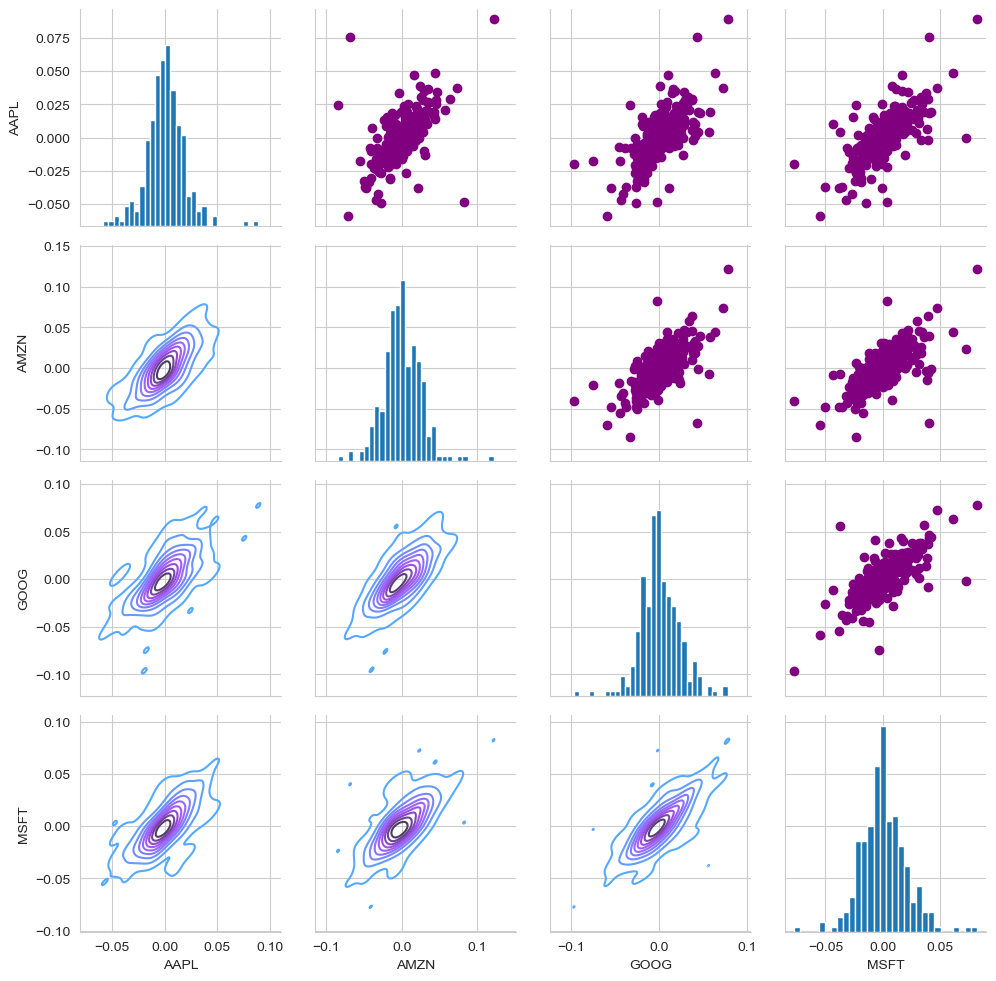

In [128]:
returns_fig= sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

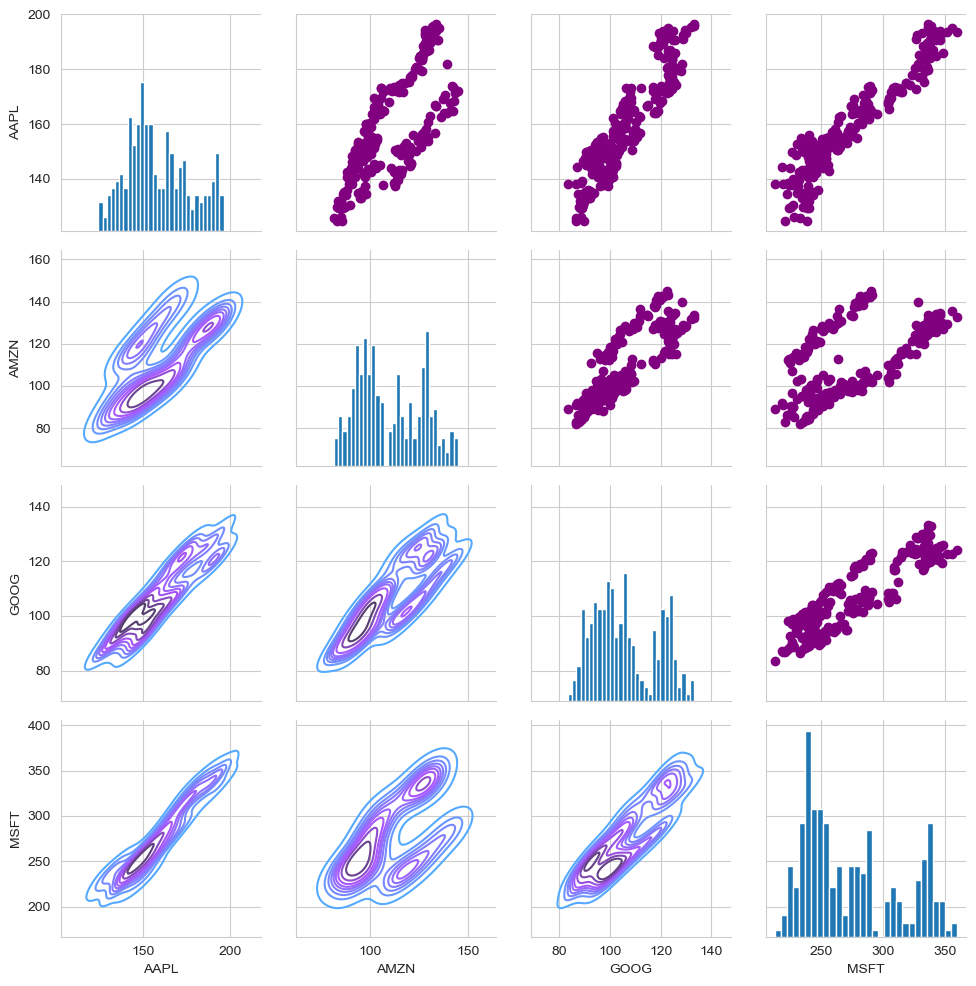

In [129]:
returns_fig= sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

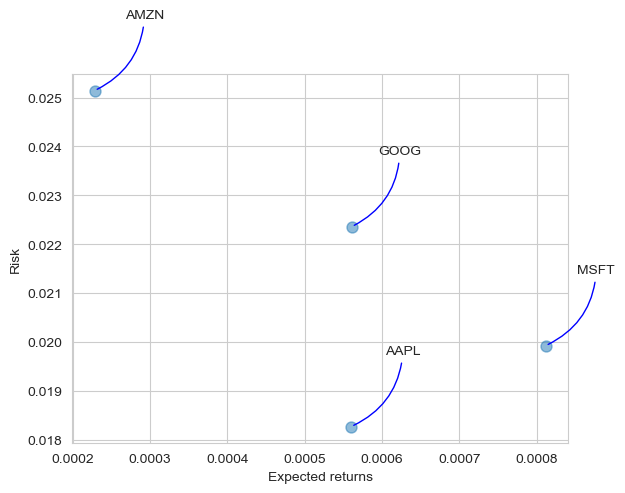

In [139]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)


plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='blue'))

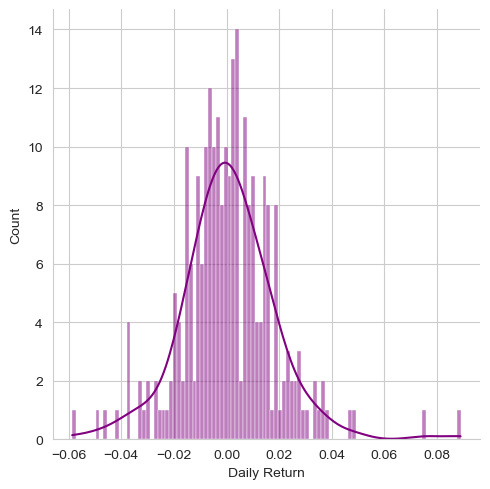

In [140]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple',kde=True)

In [141]:
rets['AAPL'].quantile(0.05)

-0.030252326541898578

In [142]:
days = 365
dt = 1/365

mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [143]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price= np.zeros(days)
    price[0]= start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [146]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-04,118.300003,119.500000,117.709999,118.870003,118.870003,15757700
2022-08-05,116.930000,118.860001,116.709999,118.220001,118.220001,15615700
2022-08-08,119.120003,120.860001,117.830002,118.139999,118.139999,17061100
2022-08-09,117.989998,118.199997,116.559998,117.500000,117.500000,15424300
2022-08-10,119.589996,121.779999,119.360001,120.650002,120.650002,20497000


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

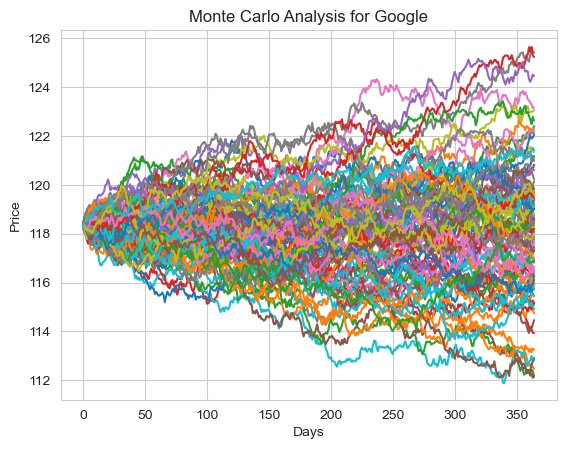

In [147]:
start_price = 118.3

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [148]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

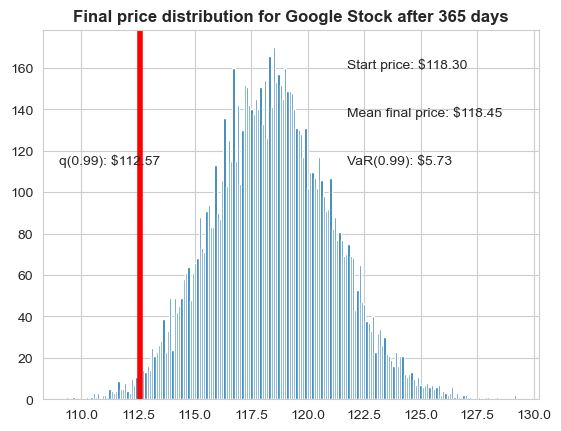

In [149]:
q = np.percentile(simulations, 1)
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');